In [1]:
import matplotlib.pyplot as plt
import networkx as nx

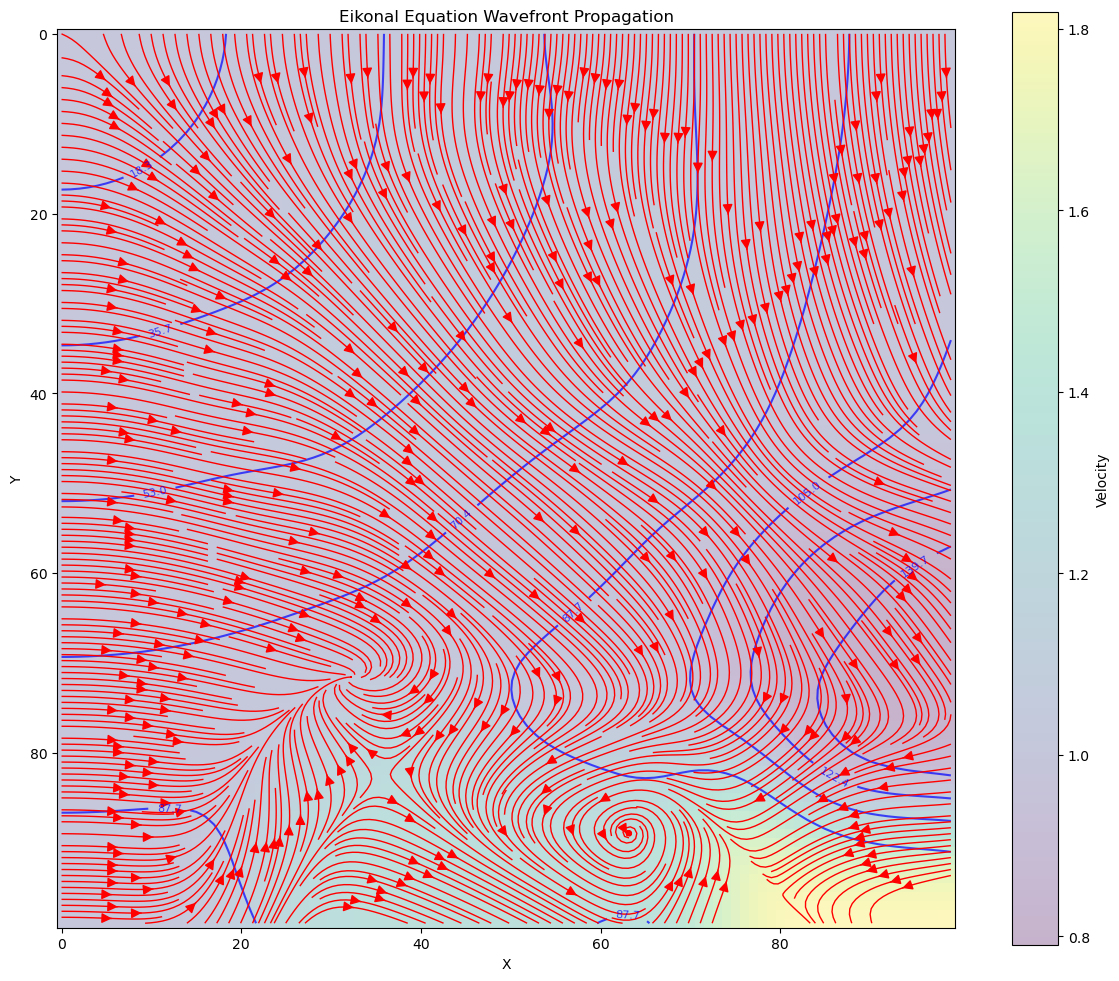

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def create_velocity_field(nx, ny, num_objects=5):
    v = np.ones((ny, nx))
    for _ in range(num_objects):
        cx, cy = np.random.randint(0, nx), np.random.randint(0, ny)
        radius = np.random.randint(10, 30)
        y, x = np.ogrid[-cy:ny-cy, -cx:nx-cx]
        mask = x*x + y*y <= radius*radius
        v[mask] = np.random.uniform(0.5, 2.0)
    return gaussian_filter(v, sigma=5)

def eikonal_solver(v, source):
    ny, nx = v.shape
    t = np.full((ny, nx), np.inf)
    t[source] = 0
    
    from scipy.ndimage import distance_transform_edt
    dist = distance_transform_edt(np.ones_like(t))
    t = dist / v
    
    return t

def plot_wavefronts_and_rays(t, v, num_wavefronts=10, num_rays=20):
    ny, nx = t.shape
    plt.figure(figsize=(12, 10))
    
    # Plot velocity field
    plt.imshow(v, cmap='viridis', alpha=0.3)
    plt.colorbar(label='Velocity')
    
    # Plot wavefronts
    levels = np.linspace(t.min(), t.max(), num_wavefronts)
    contours = plt.contour(t, levels, colors='b', alpha=0.7)
    plt.clabel(contours, inline=True, fontsize=8, fmt='%.1f')
    
    # Plot light rays
    y, x = np.ogrid[0:ny, 0:nx]
    dx, dy = np.gradient(t)
    plt.streamplot(x, y, dx, dy, color='r', linewidth=1, density=5.0, arrowsize=1.5)
    
    plt.title('Eikonal Equation Wavefront Propagation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    plt.show()

# Set up the problem
nx, ny = 100, 100
v = create_velocity_field(nx, ny)
source = (ny//2, nx//2)

# Solve Eikonal equation
t = eikonal_solver(v, source)

# Plot results
plot_wavefronts_and_rays(t, v)

C:\Users\yaozi\AppData\Local\Temp\ipykernel_13208\2488467243.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


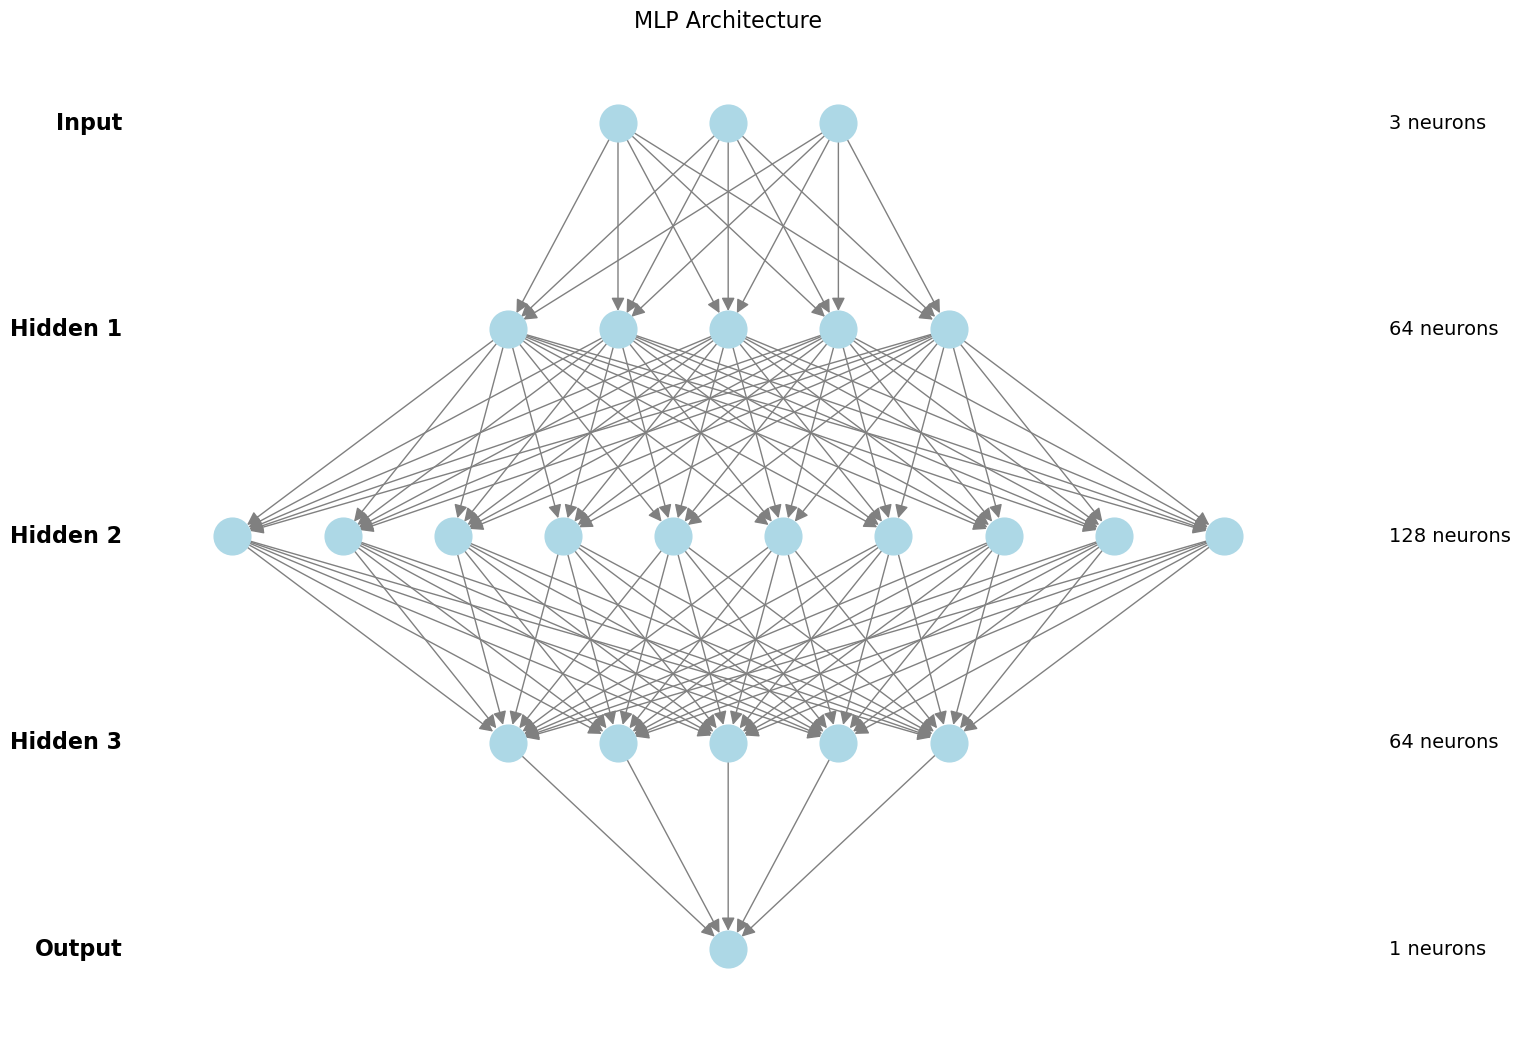

In [2]:


def plot_mlp(original_layers):
    original_layer_size = [3] + original_layers + [1]

    G = nx.DiGraph()
    pos = {}
    layers = [int(i / 12) for i in original_layers]
    layer_sizes = [3] + layers + [1]
    layer_names = ['Input'] + [f'Hidden {i+1}' for i in range(len(layers))] + ['Output']
    
    max_neurons = max(layer_sizes)
    layer_spacing = 1.5
    neuron_spacing = 1.0

    for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
        layer_width = (size - 1) * neuron_spacing
        x_offset = (max_neurons - size) * neuron_spacing / 2
        for j in range(size):
            node_id = f"{name}_{j}"
            x = x_offset + j * neuron_spacing
            y = -i * layer_spacing
            G.add_node(node_id)
            pos[node_id] = (x, y)
        
        if i > 0:
            for j in range(size):
                for k in range(layer_sizes[i-1]):
                    G.add_edge(f"{layer_names[i-1]}_{k}", f"{name}_{j}")

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=700, arrowsize=20, edge_color='gray')
    
    # 添加层标签
    for i, name in enumerate(layer_names):
        plt.text(-1, -i * layer_spacing, name, ha='right', va='center', fontsize=16, fontweight='bold')

    # 添加神经元数量标签
    for i, size in enumerate(original_layer_size):
        plt.text(max_neurons * neuron_spacing + 0.5, -i * layer_spacing, f"{size} neurons", ha='left', va='center', fontsize=14)

    plt.title("MLP Architecture", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 可视化MLP结构
plot_mlp([64, 128, 64])

C:\Users\yaozi\AppData\Local\Temp\ipykernel_13208\3154582851.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


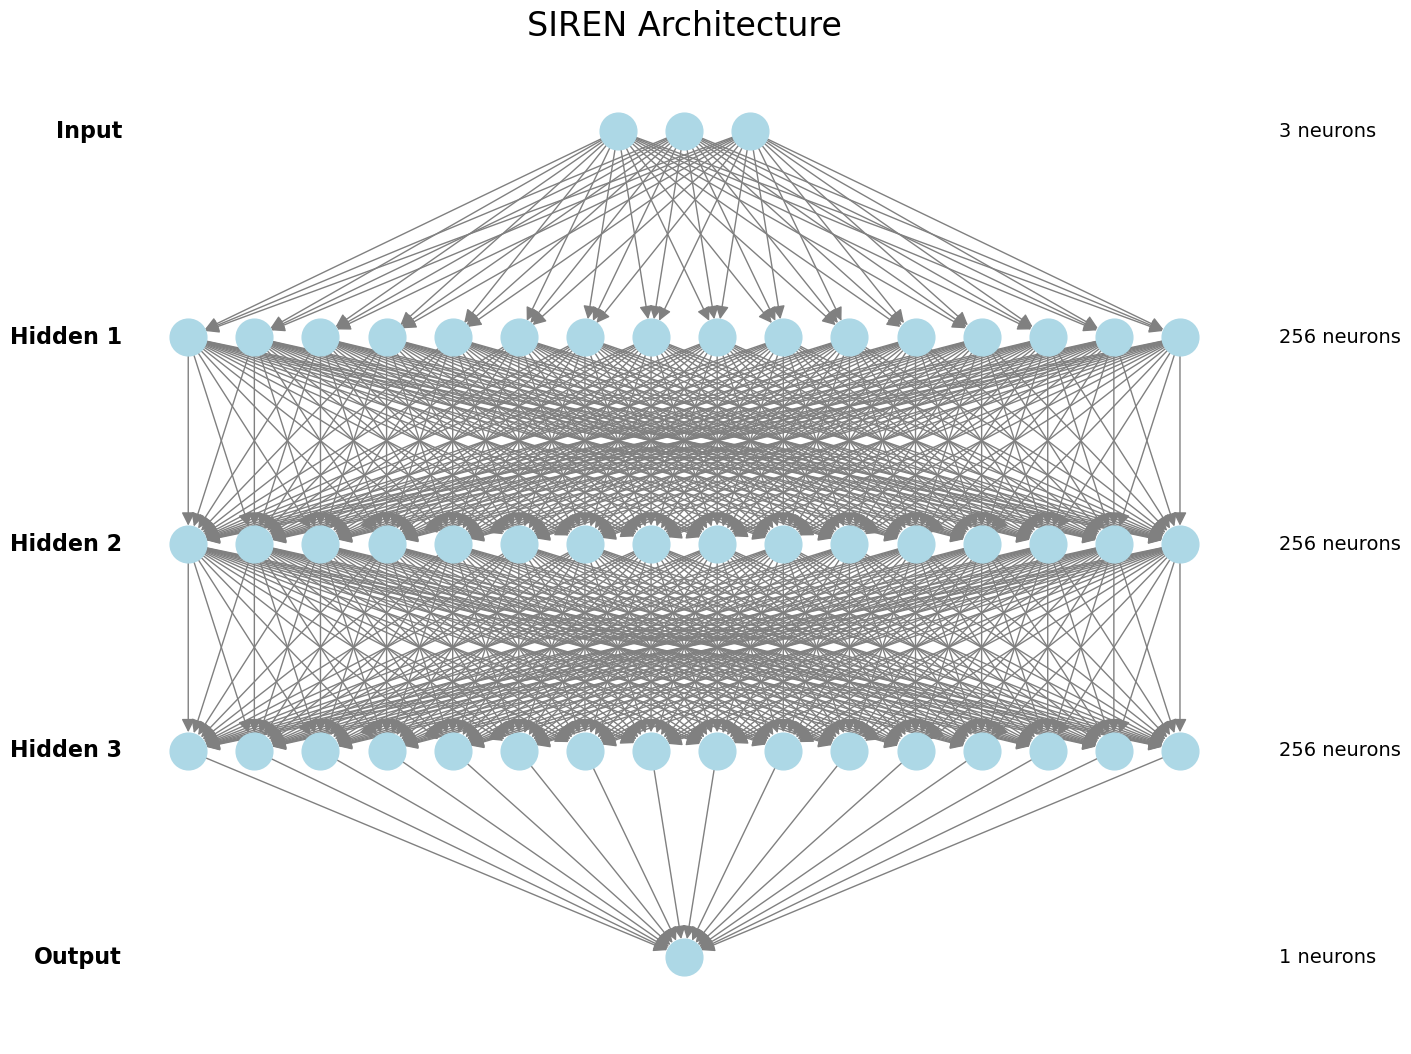

In [3]:

def plot_siren(original_layers):
    original_layer_size = [3] + original_layers + [1]

    G = nx.DiGraph()
    pos = {}
    layers = [int(i / 16) for i in original_layers]
    layer_sizes = [3] + layers + [1]
    layer_names = ['Input'] + [f'Hidden {i+1}' for i in range(len(layers))] + ['Output']
    
    max_neurons = max(layer_sizes)
    layer_spacing = 1.5
    neuron_spacing = 1.0

    for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
        layer_width = (size - 1) * neuron_spacing
        x_offset = (max_neurons - size) * neuron_spacing / 2
        for j in range(size):
            node_id = f"{name}_{j}"
            x = x_offset + j * neuron_spacing
            y = -i * layer_spacing
            G.add_node(node_id)
            pos[node_id] = (x, y)
        
        if i > 0:
            for j in range(size):
                for k in range(layer_sizes[i-1]):
                    G.add_edge(f"{layer_names[i-1]}_{k}", f"{name}_{j}")

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=700, arrowsize=20, edge_color='gray')
    
    # 添加层标签
    for i, name in enumerate(layer_names):
        plt.text(-1, -i * layer_spacing, name, ha='right', va='center', fontweight='bold', fontsize=16)

    # 添加神经元数量标签
    for i, size in enumerate(original_layer_size):
        plt.text(max_neurons * neuron_spacing + 0.5, -i * layer_spacing, f"{size} neurons", ha='left', va='center', fontsize=14)

    plt.title("SIREN Architecture", fontsize=24)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_siren([256, 256, 256])